<a href="https://colab.research.google.com/github/Alaa-abdelmajied/Face_Recognition/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip faces -d dataset
!unzip animals

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import scipy
from numpy.linalg import eig,eigh
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
# Generating the data matrix
 
def getDataMatrixFaces (path, imgNum, classNum, dataOnly):
  counter = 0
  #imgNum = 400
  imgSize = 92*112
  #classNum = 40
  data = np.zeros((imgNum,imgSize))
  labels = np.zeros((imgNum,1))
  for folderNum in range(1,classNum+1):
    folderPath = 's' + str(folderNum)
    folderPath = os.path.join(path,folderPath)
    for imageNum in range(1,11):
      imagePath = str(imageNum) + '.pgm'
      imagePath = os.path.join(folderPath,imagePath)
      image = cv2.imread(imagePath,0)
      data[counter,:] = image.flatten()
      labels[counter] = int(folderNum)
      counter += 1
  if dataOnly == False:
    return data, labels
  else:
    return data

In [ ]:
def getDataMatrixNonAndFaces (path, imgNum):
  counter = 0
  imgSize = 92*112
  data = np.zeros((imgNum,imgSize))
  # labels 0 = non faces, 1 = faces
  labels = np.zeros((imgNum,1))
  for count in range(400):
    data[count,:] = getDataMatrixFaces('/content/dataset',400,40,True)[count,:]
    labels[count] = 1
  count +=1
  for imageName in os.listdir(path):
    if count != imgNum :
      imagePath = os.path.join(path,imageName)
      image = cv2.imread(imagePath,0)
      image = cv2.resize(image, (92,112))
      data[count,:] = image.flatten()
      labels[count] = 0
      count +=1
    else:
      break
  #for imageNum in range(imgNum - 400):
  #    imagePath = 'fruit_' +str(imageNum).zfill(4) + '.jpg'
  #    imagePath = os.path.join(path,imagePath)
  #    image = cv2.imread(imagePath,0)
  #    image = cv2.resize(image, (92,112))
  #    data[count,:] = image.flatten()
  #    labels[count] = 0
  #    count +=1
  return data,labels

In [ ]:
# Splitting the data matrix 
 
def splitDataMatrix(data, labels):
 
  imgSize = 92*112
 
  trainData = np.zeros((int(len(data)/2),imgSize))
  testData = np.zeros((int(len(data)/2),imgSize))
  testCount = 0;
 
  trainLabels = np.zeros((int(len(data)/2),1))
  testLabels = np.zeros((int(len(data)/2),1))
  trainCount = 0;
 
  for count in range(0,len(data)):
    if count%2 == 0:
      testData[testCount] = data[count]
      testLabels[testCount] = labels[count]
      testCount +=1
    else:
      trainData[trainCount] = data[count]
      trainLabels[trainCount] = labels[count]
      trainCount +=1
  
  return trainData, trainLabels, testData, testLabels

In [ ]:
def splitDataMatrixBouns(data, labels):
 
  imgSize = 92*112
 
  trainData = np.zeros((int(len(data)*0.7),imgSize))
  testData = np.zeros((int(len(data)*0.3),imgSize))
  testCount = 0;
 
  trainLabels = np.zeros((int(len(data)*0.7),1))
  testLabels = np.zeros((int(len(data)*0.3),1))
  trainCount = 0;
 
  for count in range(0,len(data)):
    if count%10 < 7:
      trainData[trainCount] = data[count]
      trainLabels[trainCount] = labels[count]
      trainCount +=1
    else :
      testData[testCount] = data[count]
      testLabels[testCount] = labels[count]
      testCount +=1
 
  return trainData, trainLabels, testData, testLabels

In [ ]:
data,labels = getDataMatrixFaces ('/content/dataset', 400, 40, False)
trainData, trainLabels, testData, testLabels = splitDataMatrixBouns(data,labels)

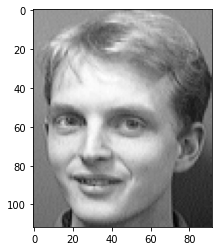

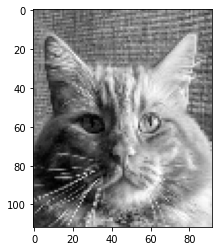

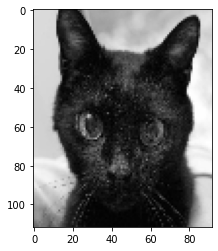

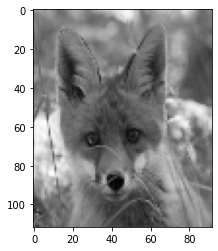

In [ ]:
data,labels= getDataMatrixNonAndFaces ('/content/animals', 1200)
trainData, trainLabels, testData, testLabels = splitDataMatrix(1200,data,labels)
# print(y[398])
# print(y[399])
# print(y[400])
# plt.figure()
# plt.imshow(trainData[199].reshape(112,92), cmap='gray');
# plt.show()
# plt.figure()
# plt.imshow(trainData[200].reshape(112,92), cmap='gray');
# plt.show()
# plt.figure()
# plt.imshow(trainData[599].reshape(112,92), cmap='gray');
# plt.show()
# plt.figure()
# plt.imshow(trainData[350].reshape(112,92), cmap='gray');
# plt.show()

In [ ]:
data,labels = getDataMatrixNonAndFaces ('/content/fruit', 800)
trainData, trainLabels, testData, testLabels = splitDataMatrix(800,data,labels)
#print(trainData.shape)
print(trainLabels)
#print(testData.shape)
print(testLabels)

In [ ]:
def knn(trainData,trainLabels,testData,testLabels,k,showSucess_Failure):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(trainData,trainLabels.ravel())
  pred = knn.predict(testData)
  #cm = metrics.confusion_matrix(testLabels, pred, labels=[1, 0])
  if showSucess_Failure == True:
    cm = pd.DataFrame(
       metrics.confusion_matrix(testLabels, pred, labels=[1, 0]), 
      index=['true:faces', 'true:non faces'], 
      columns=['pred:faces', 'pred:non faces'])
    print(cm)
    print('\n')
  accuracy  = metrics.accuracy_score(testLabels,pred)
  return accuracy

In [ ]:
def PCA(alpha,eigen_values,eigen_vectors,trainData,testData):
  totalVariance=sum(eigen_values)
  currentVariance=0
  for i in range(len(trainData[0])): 
     currentVariance=sum(eigen_values[:i])
     explained_variance=currentVariance/totalVariance
     if(explained_variance>=alpha):
       U=eigen_vectors[:,:i]
       #print(i)
       break
  reducedTrainData=np.dot(U.T,trainData.T)
  reducedTestData=np.dot(U.T,testData.T)
  
  return reducedTrainData,reducedTestData
 
 
def FindEigenVal_Vec(trainData):
 
  mean_trainData = np.mean(trainData,axis = 0)
  centeredMat_trainData= trainData-mean_trainData
  covarianceMat_trainData = np.cov(centeredMat_trainData.transpose(),bias=1)
  
  eigen_values, eigen_vectors = eigh(covarianceMat_trainData)
 
  idx=eigen_values.argsort()[::-1]
  eigen_values=eigen_values[idx]
  eigen_vectors=eigen_vectors[:,idx]
 
  return eigen_values,eigen_vectors

@ k=  1
                pred:faces  pred:non faces
true:faces             200               0
true:non faces          34             166


when alpha= 0.8 accuracy= 0.915
                pred:faces  pred:non faces
true:faces             200               0
true:non faces          38             162


when alpha= 0.85 accuracy= 0.905
                pred:faces  pred:non faces
true:faces             200               0
true:non faces          46             154


when alpha= 0.9 accuracy= 0.885
                pred:faces  pred:non faces
true:faces             200               0
true:non faces          48             152


when alpha= 0.95 accuracy= 0.88
@ k=  3
                pred:faces  pred:non faces
true:faces             200               0
true:non faces          41             159


when alpha= 0.8 accuracy= 0.8975
                pred:faces  pred:non faces
true:faces             200               0
true:non faces          48             152


when alpha= 0.85 accuracy= 0.88
    

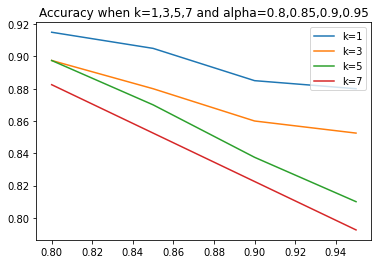

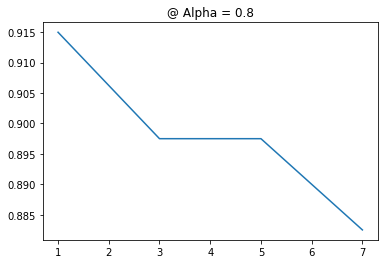

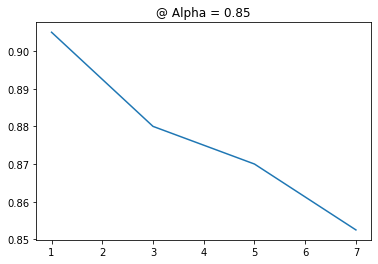

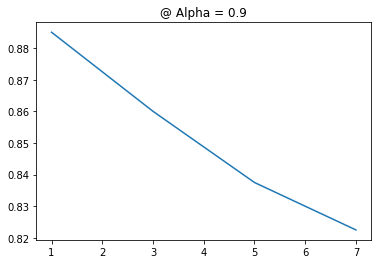

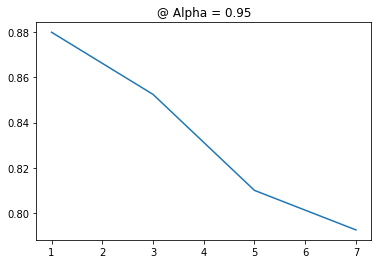

In [ ]:
data,labels=getDataMatrixNonAndFaces ('/content/animals', 800)
trainData, trainLabels, testData, testLabels = splitDataMatrix(data,labels)
eigen_values,eigen_vectors=FindEigenVal_Vec(trainData)
# reducedTrainData,reducedTestData=PCA([0.8,0.85,0.9,0.95],eigen_values,eigen_vectors,trainData,testData)


#Reduction 
alphas = [0.8,0.85,0.9,0.95]
neighbours=[1,3,5,7]
accuracy=[]


for i in neighbours:
  accuracy[:]=[]
  count = 0
  print('@ k= ',i)
  for alpha in alphas:
    reducedTrainData,reducedTestData=PCA(alpha,eigen_values,eigen_vectors,trainData,testData)
    accuracy.append(knn(reducedTrainData.T,trainLabels,reducedTestData.T,testLabels,i,True))
    print('when alpha=',alpha,'accuracy=',accuracy[count])
    count +=1
  #plt.figure()
  plt.plot(alphas,accuracy,label='k='+str(i))
  plt.title("Accuracy when k=1,3,5,7 and alpha=0.8,0.85,0.9,0.95")
  
  plt.legend(loc='upper right')
  
for alpha in alphas:
  accuracy[:]=[]
  count = 0
  print('@ alpha= ',alpha)
  for i in neighbours:
    reducedTrainData,reducedTestData=PCA(alpha,eigen_values,eigen_vectors,trainData,testData)
    accuracy.append(knn(reducedTrainData.T,trainLabels,reducedTestData.T,testLabels,i,True))
    print('when k=',i,',accuracy=',accuracy[count])
    count +=1
  plt.figure()
  plt.plot(neighbours,accuracy)
  plt.title('@ Alpha = '+str(alpha))
  


In [ ]:
def LDA (trainData, testData):
  
  imgSize = 92*112
 
  #Calculate the overall mean
  overallMeanLDA = np.mean(trainData,axis = 0)
 
  #Calculate each class mean
  classMean = np.zeros((int(len(trainData)/5),imgSize))
  for i in range(0,len(trainData),5):
    classMean[int(i/5)] = np.mean(trainData[i:i+5,:],axis = 0)
 
  #Calculate Sb
  sb = np.zeros((imgSize,imgSize))
  for i in range(int(len(trainData)/5)):
    sb +=  5 * np.outer((classMean[i] - overallMeanLDA),(classMean[i] - overallMeanLDA).T)
 
  #Calculate the center class matrix (Zi)
  centerClassMatLDA = np.zeros((len(trainData),imgSize))
  for i in range(len(trainData)):
    centerClassMatLDA[i] = trainData[i] - classMean[int(i/5)]
 
  #Calculate the within class scatter matrix (S)
  withinClassScatterMatLDA = np.zeros((imgSize,imgSize))
  for i in range(0,len(trainData),5):
    centerClassMat=centerClassMatLDA[i:i+5]
    withinClassScatterMatLDA += np.dot(centerClassMat.T,centerClassMat) 
  
  #Getting the within class scatter matrix inverse
  withinClassScatterMatLDAinv = scipy.linalg.pinvh(withinClassScatterMatLDA)
 
  #Calculating the eignvalues and eignvectors
  eValues,eVectors = np.linalg.eigh(np.dot(withinClassScatterMatLDAinv,sb))
 
  #Getting the dominant 39 eignvectors
  index = eValues.argsort()[-39:][::-1]
  
  #Creating the projection matrix
  U = eVectors[:,index]
 
  #Reduction of train data and test data
  reducedTrain = np.dot(U.T,trainData.T)
  reducedTest = np.dot(U.T,testData.T)
 
  return reducedTrain, reducedTest

In [ ]:
def LDA_NonFaces(trainData, testData):
 
  imgSize = 92*112
 
    #Calculate each class mean
  classMean = np.zeros((2,imgSize))
  classMean[0]=np.mean(trainData[0:200,:])
  classMean[1]=np.mean(trainData[200:,:])
 
  meanDifference=classMean[0]-classMean[1]
  betweenClassScatterMat=np.dot(meanDifference.T,meanDifference)

In [ ]:
def KNN_ClassifierLDA(reducedTrain,trainLabels,reducedTest,testLabels):
  accuracy=[]
  neighbours=[1,3,5,7]
  count = 0
  for i in neighbours:
    accuracy.append(knn(reducedTrain.T,trainLabels,reducedTest.T,testLabels,i))
    print('Accuracy at k = ' + str(i) + ' is: ' + str(accuracy[count]))
    count +=1
  plt.plot(neighbours,accuracy)
  plt.xlabel('K')
  plt.ylabel('accuracy')
  plt.show()

In [ ]:
data,labels = getDataMatrixFaces ('/content/dataset', 400, 40, False)
trainData, trainLabels, testData, testLabels = splitDataMatrix(data,labels)

In [ ]:
print(int(len(trainData)/5))

In [ ]:
 
reducedTrain, reducedTest= LDA(trainData,testData)
KNN_ClassifierLDA(reducedTrain,trainLabels,reducedTest,testLabels)
# print(knn(reducedTrain.T,trainLabels,reducedTest.T,testLabels,1))
# print(knn(reducedTrain.T,trainLabels,reducedTest.T,testLabels,3))
# print(knn(reducedTrain.T,trainLabels,reducedTest.T,testLabels,5))
# print(knn(reducedTrain.T,trainLabels,reducedTest.T,testLabels,7))

Accuracy at k = 1 is: 0.95
Accuracy at k = 3 is: 0.875
Accuracy at k = 5 is: 0.865
Accuracy at k = 7 is: 0.84


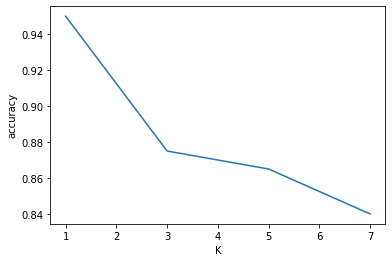

In [ ]:
KNN_ClassifierLDA(reducedTrain,trainLabels,reducedTest,testLabels)

Accuracy at k = 1 is: 0.96
Accuracy at k = 3 is: 0.885
Accuracy at k = 5 is: 0.905
Accuracy at k = 7 is: 0.92


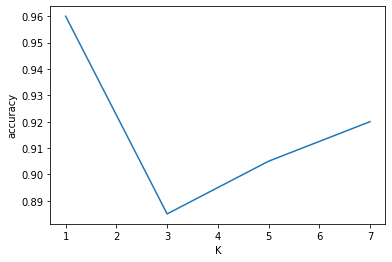

In [ ]:
KNN_ClassifierLDA(np.real(reducedTrain),trainLabels,np.real(reducedTest),testLabels)

In [ ]:
# Classification using LDA
 
overallMeanLDA = np.mean(trainData,axis = 0)
 
#print(overallMeanLDA)
 
classMean = np.zeros((classNum,imgSize))
for i in range(0,trainCount,5):
  classMean[int(i/5)] = np.mean(trainData[i:i+5,:],axis = 0)
 
sb = np.zeros((imgSize,imgSize))
for i in range(classNum):
  sb +=  5 * np.outer((classMean[i] - overallMeanLDA),(classMean[i] - overallMeanLDA).T)
 
#sb = 5 * np.dot((classMean - overallMeanLDA).T,(classMean - overallMeanLDA))
print(sb)
print(sb.shape)
 
centerClassMatLDA = np.zeros((trainCount,imgSize))
withinClassScatterMatLDA = np.zeros((imgSize,imgSize))
 
for i in range(trainCount):
  centerClassMatLDA[i] = trainData[i] - classMean[int(i/5)]
print(centerClassMatLDA.shape)
 
for i in range(0,trainCount,5):
  centerClassMat=centerClassMatLDA[i:i+5]
  withinClassScatterMatLDA += np.dot(centerClassMat.T,centerClassMat) 
 
#print(centerClassMatLDA[5:10])
#print(classScatterMatLDA)
print(withinClassScatterMatLDA)

[[235278.32  232717.44  233560.64  ... -43174.56  -21703.44  -15646.88 ]
 [232717.44  230668.78  231142.03  ... -40923.52  -20191.43  -14642.46 ]
 [233560.64  231142.03  232523.155 ... -39926.72  -18941.855 -13273.41 ]
 ...
 [-43174.56  -40923.52  -39926.72  ... 360976.48  315665.12  312321.04 ]
 [-21703.44  -20191.43  -18941.855 ... 315665.12  294892.955 289157.81 ]
 [-15646.88  -14642.46  -13273.41  ... 312321.04  289157.81  289627.82 ]]
(10304, 10304)
(200, 10304)
[[ 28496.8  27128.2  27372.4 ...  -3977.2  -3511.6    539. ]
 [ 27128.2  28448.8  27518.6 ...  -2697.2  -2349.2   1781.6]
 [ 27372.4  27518.6  28698.4 ...  -3472.2   -923.2   3416.2]
 ...
 [ -3977.2  -2697.2  -3472.2 ... 140034.   83425.8  64222.2]
 [ -3511.6  -2349.2   -923.2 ...  83425.8  99585.6  82754.4]
 [   539.    1781.6   3416.2 ...  64222.2  82754.4 104148.8]]


In [ ]:
withinClassScatterMatLDApinv = np.linalg.pinv(withinClassScatterMatLDA)
withinClassScatterMatLDAinv = np.linalg.inv(withinClassScatterMatLDA)

In [ ]:
eValues,eVectors = np.linalg.eigh(np.dot(withinClassScatterMatLDApinv,sb))
eValuesInv,eVectorsInv = np.linalg.eigh(np.dot(withinClassScatterMatLDAinv,sb))

In [ ]:
print(eValues)
print(eValues.shape)
print(eVectors)
print(eVectors.shape)
index = eValues.argsort()[-39:][::-1]
print(index)
#U = np.real(eVectors[:,index])
U = eVectors[:,index]
#print(U)
#print(U.shape)
reducedTrain = np.dot(U.T,trainData.T)
reducedTest = np.dot(U.T,testData.T)
print(knn(reducedTrain.T,trainLabels,reducedTest.T,testLabels,1))
print(knn(reducedTrain.T,trainLabels,reducedTest.T,testLabels,3))
print(knn(reducedTrain.T,trainLabels,reducedTest.T,testLabels,5))
print(knn(reducedTrain.T,trainLabels,reducedTest.T,testLabels,7))

[-1.39328119e+12 -1.11153059e+12 -9.00538068e+11 ...  9.39074732e+11
  1.15324490e+12  1.62381340e+12]
(10304,)
[[-9.88271566e-02  4.63506969e-01 -2.78647909e-02 ...  1.58055662e-02
  -4.02105045e-01  3.31733639e-02]
 [-1.19357366e-01  5.85641488e-01 -3.70212968e-02 ...  1.04529973e-02
  -2.90005378e-01  2.64887909e-02]
 [ 9.37026265e-03 -1.88567629e-01  2.24322925e-02 ...  3.30681602e-02
  -7.84315363e-01  5.65730047e-02]
 ...
 [ 3.74207690e-03  1.03810383e-03  3.67704559e-03 ...  3.96278121e-03
   4.32526498e-04  4.12659848e-03]
 [-6.15602750e-03 -1.05362183e-03  6.17332777e-03 ...  5.99702720e-03
  -7.74266284e-05 -5.44743023e-03]
 [-1.53865150e-03 -8.19730648e-08  6.46253967e-03 ...  6.53533070e-03
   2.35882464e-04 -8.20975688e-04]]
(10304, 10304)
[10303 10302 10301 10300 10299 10298 10297 10296 10295 10294 10293 10292
 10291 10290 10289 10288 10287 10286 10285 10284 10283 10282 10281 10280
 10279 10278 10277 10276 10275 10274 10273 10272 10271 10270 10269 10268
 10267 10266 10265